# FINDING THE BEST MARKETS TO ADVERTISE IN AN E-LEARNING PRODUCT

Let's assume that we're working for an an e-learning company that offers courses on programming. Most of our courses are on web and mobile development, but we also cover many other domains, like data science, game development, etc. We want to promote our product and we'd like to invest some money in advertisement. Our goal in this project is to find out the two best markets to advertise our product in.

We can try to search existing data that might be relevant for our purpose. One good candidate is the data from freeCodeCamp's 2017 New Coder Survey. freeCodeCamp is a free e-learning platform that offers courses on web development. Because they run a popular Medium publication (over 400,000 followers), their survey attracted new coders with varying interests (not only web development), which is ideal for the purpose of our analysis.

## UNDERSTANDING THE DATA

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 100)
new_coders=pd.read_csv('2017-fCC-New-Coders-Survey-Data.csv')
new_coders.head()

c:\users\nitish hulk\appdata\local\programs\python\python38\lib\site-packages\IPython\core\interactiveshell.py:3062: DtypeWarning: Columns (17,62) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
0,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15 to 29 minutes,Canada,Canada,software development and IT,NaN,Employed for wages,NaN,NaN,NaN,NaN,female,NaN,NaN,1.0,0.0,1.0,0.0,0.0,0.0,NaN,15.0,02d9465b21e8bd09374b0066fb2d5614,eb78c1c3ac6cd9052aec557065070fbf,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,start your own business,NaN,NaN,NaN,English,married or domestic partnership,150.0,6.0,6f1fbc6b2b,2017-03-09 00:36:22,2017-03-09 00:32:59,2017-03-09 00:59:46,2017-03-09 00:36:26,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,"some college credit, no degree",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,United States of America,NaN,NaN,Not working but looking for work,NaN,35000.0,NaN,NaN,male,NaN,NaN,1.0,0.0,1.0,0.0,0.0,1.0,NaN,10.0,5bfef9ecb211ec4f518cfc1d2a6f3e0c,21db37adb60cdcafadfa7dca1b13b6b1,NaN,0.0,0.0,0.0,NaN,Within 7 to 12 months,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,work for a nonprofit,1.0,Full-Stack Web Developer,in an office with other developers,English,"single, never married",80.0,6.0,f8f8be6910,2017-03-09 00:37:07,2017-03-09 00:33:26,2017-03-09 00:38:59,2017-03-09 00:37:10,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,1.0,"some college credit, no degree",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,NaN,

In [2]:
new_coders.columns

Index(['Age', 'AttendedBootcamp', 'BootcampFinish', 'BootcampLoanYesNo',
       'BootcampName', 'BootcampRecommend', 'ChildrenNumber', 'CityPopulation',
       'CodeEventConferences', 'CodeEventDjangoGirls',
       ...
       'YouTubeFCC', 'YouTubeFunFunFunction', 'YouTubeGoogleDev',
       'YouTubeLearnCode', 'YouTubeLevelUpTuts', 'YouTubeMIT',
       'YouTubeMozillaHacks', 'YouTubeOther', 'YouTubeSimplilearn',
       'YouTubeTheNewBoston'],
      dtype='object', length=136)

In [3]:
survey1=pd.read_csv('survey1.csv')
survey2=pd.read_csv('survey2.csv')

c:\users\nitish hulk\appdata\local\programs\python\python38\lib\site-packages\IPython\core\interactiveshell.py:3062: DtypeWarning: Columns (34) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
survey1.head()

,#,Are you already working as a software developer?,Is this your first software development job?,"Before you got this job, how many months did you spend looking for a job?",Would you prefer to...,Full-Stack Web Developer,Back-End Web Developer,Front-End Web Developer,Mobile Developer,DevOps / SysAdmin,Data Scientist,Quality Assurance Engineer,User Experience Designer,Product Manager,Game Developer,Information Security,Data Engineer,Other,When do you plan to start applying for developer jobs?,About how much money do you expect to earn per year at your first developer job (in US Dollars)?,Would you prefer to work...,Are you willing to relocate for a job?,freeCodeCamp,EdX,Coursera,Khan Academy,Pluralsight / Code School,Codecademy,Udacity,Udemy,Code Wars,The Odin Project,Treehouse,Lynda.com,Stack Overflow,W3Schools,Skillcrush,HackerRank,Mozilla Developer Network (MDN),Egghead.io,CSS Tricks,Other.1,freeCodeCamp study groups,hackathons,conferences,workshops,Startup Weekend,NodeSchool,Women Who Code,Girl Develop It,Meetup.com events,RailsBridge,Game Jam,Rails Girls,Django Girls,weekend bootcamps,Other.2,Code Newbie,The Changelog,Software Engineering Daily,JavaScript Jabber,Ruby Rogues,Shop Talk Show,Developer Tea,Programming Throwdown,.NET Rocks,Talk Python To Me,JavaScript Air,The Web Ahead,CodePen Radio,Giant Robots Smashing into Other Giant Robots,Software Engineering Radio,Other.3,MIT Open Courseware,The New Boston,freeCodeCamp.1,Computerphile,DevTips,Engineered Truth,LearnCode.Academy,CodeCourse,LevelUpTuts,funfunfunction,Coding Tutorials 360,Coding Train (Coding Rainbow),Derek Banas,Simplilearn,Mozilla Hacks,Google Developers,Other.4,About how many hours do you spend learning each week?,About how many months have you been programming for?,Have you attended a full-time coding bootcamp?,Which one?,Have you finished yet?,Did you take out a loan to pay for the bootcamp?,"Based on your experience, would you recommend this bootcamp to your friends?","Aside from university tuition, about how much money have you spent on learning to code so far (in US dollars)?",Start Date (UTC),Submit Date (UTC),Network ID
0,79ebf38df5af76ed07f343b6b9df592b,0.0,NaN,NaN,freelance,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,freeCodeCamp,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Stack Overflow,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-03-08 22:59:57,2017-03-08 23:02:11,8da0a6d40b
1,6fceea8a8dbb439da36e804e743f5dc1,0.0,NaN,NaN,start your own business,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,freeCodeCamp,NaN,NaN,NaN,NaN,NaN,NaN,Udemy,NaN,NaN,NaN,NaN,Stack Overflow,W3Schools,NaN,NaN,Mozilla Developer Network (MDN),NaN,NaN,NaN,freeCodeCamp study groups,NaN,NaN,NaN,NaN,NodeSchool,NaN,NaN,Meetup.com events,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,JavaScript Air,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CodeCourse,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.0,12.0,0.0,NaN,NaN,NaN,NaN,200.0,2017-03-09 00:28:01,2017-03-09 00:30:27,61f18b113d
2,02d9465b21e8bd09374b0066fb2d5614,0.0,NaN,NaN,start your own business,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,freeCodeCamp,NaN,NaN,NaN,NaN,Codecademy,NaN,Udemy,NaN,NaN,NaN,NaN,NaN,W3Schools,NaN,NaN,Mozilla Developer Network (MDN),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Developer Tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.0,6.0,0.0,NaN,NaN,NaN,NaN,150.0,2017-03-09 00:32:59,2017-03-09 00:36:22,6f1fbc6b2b
3,5bfef9ecb211ec4f518cfc1d2a6f3e0c,0.0,NaN,NaN,work for a nonprofit,Full-Stack Web Developer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Within 7 to 12 months,35000.0,in an office with o

In [5]:
survey2.head()

,#,How old are you?,What's your gender?,Other,Which country are you a citizen of?,Which country do you currently live in?,About how many people live in your city?,Are you an ethnic minority in your country?,Which language do you you speak at home with your family?,What's the highest degree or level of school you have completed?,What was the main subject you studied in university?,What's your marital status?,Do you financially support any dependents?,Do you have children?,How many children do you have?,Do you financially support any elderly relatives or relatives with disabilities?,Do you have any debt?,Do you have a home mortgage?,About how much do you owe on your home mortgage (in US Dollars)?,Do you have student loan debt?,About how much do you owe in student loans (in US Dollars)?,"Regarding employment status, are you currently...",Other.1,Which field do you work in?,Other.2,About how much money did you make last year (in US dollars)?,About how many minutes does it take you to get to work each day?,Do you consider yourself under-employed?,Have you served in your country's military before?,Do you receive disability benefits from your government?,Do you have high speed internet at your home?,already_working,jobs_interested_in,want_employment_type,expected_earnings,home_or_remote,will_relocate,attended_event_types,learning_resources,hours_learning_week,months_learning,attend_bootcamp,which_bootcamp,finished_bootcamp,loan_for_bootcamp,recommend_bootcamp,total_spent_learning,podcast,how_soon_jobhunt,youtube,Start Date (UTC),Submit Date (UTC),Network ID
0,21db37adb60cdcafadfa7dca1b13b6b1,34.0,male,NaN,United States of America,United States of America,"less than 100,000",0.0,English,"some college credit, no degree",NaN,"single, never married",0.0,NaN,NaN,NaN,1.0,0.0,NaN,1.0,NaN,Not working but looking for work,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.0,No,Full-Stack Web Developer,work for a nonprofit,35000,in an office with other developers,Yes,NaN,"Codecademy, Stack Overflow, W3Schools, CSS Tri...",10,6,No,NaN,NaN,NaN,NaN,80,Code Newbie,Within 7 to 12 months,NaN,2017-03-09 00:37:10,2017-03-09 00:38:59,f8f8be6910
1,e0b92236ac53b58f079231e014748dc3,26.0,male,NaN,Brazil,Brazil,more than 1 million,1.0,Portuguese,"some college credit, no degree",NaN,married or domestic partnership,1.0,1.0,1.0,0.0,0.0,NaN,NaN,NaN,NaN,Employed for wages,NaN,software development and IT,NaN,15000.0,45 to 60 minutes,0.0,0.0,0.0,1.0,Yes,NaN,NaN,NaN,NaN,NaN,NaN,"freeCodeCamp, Udacity, Khan Academy, EdX, Mozi...",5,48,No,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,2017-03-09 00:37:32,2017-03-09 00:39:58,bed0457175
2,21ba173828fbe9e27ccebaf4d5166a55,21.0,male,NaN,United States of America,United States of America,more than 1 million,1.0,Spanish,high school diploma or equivalent (GED),NaN,"single, never married",0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,Employed for wages,NaN,software development and IT,NaN,13000.0,15 to 29 minutes,0.0,0.0,0.0,1.0,No,"Front-End Web Developer, Back-End Web Develo...",work for a medium-sized company,70000,no preference,Yes,"NodeSchool, hackathons","Udemy, Codecademy, CSS Tricks, freeCodeCamp, M...",25,5,No,NaN,NaN,NaN,NaN,1000,"Shop Talk Show, The Changelog, CodePen Radio, ...",Within 7 to 12 months,NaN,2017-03-09 00:38:02,2017-03-09 00:40:14,2ed189768e
3,3be37b558f02daae93a6da10f83f0c77,26.0,male,NaN,Brazil,Brazil,"between 100,000 and 1 million",0.0,Portuguese,"some college credit, no degree",NaN,married or domestic partnership,1.0,0.0,NaN,0.0,1.0,1.0,40000.0,0.0,NaN,Employed for wages,NaN,software development and IT,NaN,24000.0,I work from home,1.0,0.0,0.0,1.0,No,"Front-End Web Developer, Full-Stack Web Deve...",work for a medium-sized company,40000,from home,NaN,NaN,"Mozilla Developer Network (MDN), Egghead.io, f...",14,5,No,NaN,NaN,NaN,NaN,0,NaN,Within the next 6 months,NaN,2017-03-09 00:40:18,2017-03-09 00:42:26,dbdc0664d1
4,d7c56bbf2c7b62096be9db010e86d96d,20.0,female,NaN,Portugal,Portugal,"between 100,000 and 1 million",0.0,Portuguese,bachelor's degr

In [6]:
i=pd.DataFrame(new_coders['JobRoleInterest'].value_counts(normalize=True).sort_index(ascending = True)*100)
i

,JobRoleInterest
Data Scientist,2.173913
"Data Scientist, DevOps / SysAdmin",0.014302
"Data Scientist, DevOps / SysAdmin, Front-End Web Developer, Full-Stack Web Developer, Data Engineer",0.014302
"Data Scientist, DevOps / SysAdmin, Mobile Developer, Front-End Web Developer, Quality Assurance Engineer, Information Security, Product Manager, User Experience Designer, Data Engineer",0.014302
"Data Scientist, DevOps / SysAdmin, Product Manager",0.014302
...,...
philosopher,0.014302
programmer,0.014302
software developer,0.014302
undeceided,0.014302


In [7]:
i=i.reset_index()
i

,index,JobRoleInterest
0,Data Scientist,2.173913
1,"Data Scientist, DevOps / SysAdmin",0.014302
2,"Data Scientist, DevOps / SysAdmin, Front...",0.014302
3,"Data Scientist, DevOps / SysAdmin, Mobil...",0.014302
4,"Data Scientist, DevOps / SysAdmin, Produ...",0.014302
...,...,...
3208,philosopher,0.014302
3209,programmer,0.014302
3210,software developer,0.014302
3211,undeceided,0.014302


In [8]:
i['index']=i['index'].astype(str)

In [9]:
count=0
for g in i['index']:
    if 'Mobile Developer' in g or 'Full-stack Web Developer' in g or 'Front-End Web Developer' in g or 'Back-End Web Developer' in g:
        count+=1
# count the number of web or mobile developers (any two)

In [10]:
print(count)
plot1=pd.DataFrame()
plot1['count']=[2757,456]
plot1

2757


,count
0,2757
1,456


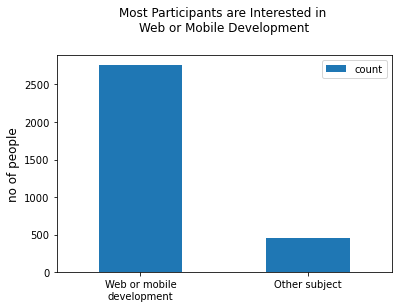

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
plot1.plot.bar()
plt.title('Most Participants are Interested in \nWeb or Mobile Development',
          y = 1.08) # y pads the title upward
plt.ylabel('no of people', fontsize = 12)
plt.xticks([0,1],['Web or mobile\ndevelopment', 'Other subject'],
           rotation = 0) # the initial xtick labels were True and False
plt.show()

In [12]:
fcc_good = new_coders[['CountryLive','JobRoleInterest','MoneyForLearning','MonthsProgramming']]
fcc_good['JobRoleInterest'].dropna(inplace=True)
fcc_good=fcc_good.reset_index().drop(columns='index')
fcc_good = new_coders[new_coders['JobRoleInterest'].notnull()].copy()
live = new_coders[['CountryLive','JobRoleInterest']]
live

c:\users\nitish hulk\appdata\local\programs\python\python38\lib\site-packages\pandas\core\series.py:4494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(result)


,CountryLive,JobRoleInterest
0,Canada,NaN
1,United States of America,Full-Stack Web Developer
2,United States of America,"Front-End Web Developer, Back-End Web Develo..."
3,Brazil,"Front-End Web Developer, Full-Stack Web Deve..."
4,Portugal,"Full-Stack Web Developer, Information Security..."
...,...,...
18170,Indonesia,NaN
18171,Nigeria,"DevOps / SysAdmin, Mobile Developer, Pro..."
18172,South Africa,NaN
18173,United Kingdom,NaN


In [13]:
live.dropna(inplace=True)

<ipython-input-13-d7ff882c52ce>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  live.dropna(inplace=True)


In [14]:
live

,CountryLive,JobRoleInterest
1,United States of America,Full-Stack Web Developer
2,United States of America,"Front-End Web Developer, Back-End Web Develo..."
3,Brazil,"Front-End Web Developer, Full-Stack Web Deve..."
4,Portugal,"Full-Stack Web Developer, Information Security..."
6,United Kingdom,Full-Stack Web Developer
...,...,...
18161,Republic of Serbia,Full-Stack Web Developer
18162,Philippines,"Data Scientist, Game Developer, Quality As..."
18163,United States of America,"Back-End Web Developer, Data Engineer, Data ..."
18171,Nigeria,"DevOps / SysAdmin, Mobile Developer, Pro..."


In [15]:
live=live.reset_index().drop(columns='index')
live

,CountryLive,JobRoleInterest
0,United States of America,Full-Stack Web Developer
1,United States of America,"Front-End Web Developer, Back-End Web Develo..."
2,Brazil,"Front-End Web Developer, Full-Stack Web Deve..."
3,Portugal,"Full-Stack Web Developer, Information Security..."
4,United Kingdom,Full-Stack Web Developer
...,...,...
6833,Republic of Serbia,Full-Stack Web Developer
6834,Philippines,"Data Scientist, Game Developer, Quality As..."
6835,United States of America,"Back-End Web Developer, Data Engineer, Data ..."
6836,Nigeria,"DevOps / SysAdmin, Mobile Developer, Pro..."


In [16]:
live = live.groupby('CountryLive').count().sort_values('JobRoleInterest',ascending=False)
live
# count number of people interested in web and mobile development or both 

,JobRoleInterest
CountryLive,
United States of America,3125
India,528
United Kingdom,315
Canada,260
Poland,131
...,...
Samoa,1
Guatemala,1
Guadeloupe,1


Previously, we found useful information about the location of new coders, and what are the countries where new coders live, but we need to go more in depth with our analysis before taking a decision. We can continue by figuring out how much money new coders are actually willing to spend on learning. Advertising within markets where most people are only willing to learn for free is extremely unlikely to be profitable for us.

The MoneyForLearning column describes in American dollars the amount of money spent by participants from the moment they started coding until the moment they completed the survey. Our company sells subscriptions at a price of $59 per month, and for this reason we're interested in finding out how much money each student spends per month.

It also seems like a good idea to narrow down our analysis to only four countries: the US, India, the United Kingdom, and Canada. Two reasons for this decision are:

These are the countries having the highest absolute frequencies in our sample, which means we have a decent amount of data for each.
Our courses are written in English, and English is an official language in all these four countries. The more people that know English, the better our chances to target the right people with our ads.


In [17]:
fcc_good['MoneyForLearning']

1           80.0
2         1000.0
3            0.0
4            0.0
6            0.0
          ...   
18161        0.0
18162        0.0
18163        0.0
18171    10000.0
18174        NaN
Name: MoneyForLearning, Length: 6992, dtype: float64

In [18]:
fcc_good['MonthsProgramming']

1         6.0
2         5.0
3         5.0
4        24.0
6        12.0
         ... 
18161     6.0
18162    84.0
18163     NaN
18171     1.0
18174    10.0
Name: MonthsProgramming, Length: 6992, dtype: float64

In [19]:
fcc_good['MonthsProgramming'].replace(0,1,inplace=True)

In [20]:
fcc_good['Month_money']=fcc_good['MoneyForLearning']/fcc_good['MonthsProgramming']

In [21]:
fcc_good['Month_money'].isnull().sum()

675

In [22]:
fcc_good = fcc_good[fcc_good['Month_money'].notnull()]
# considering only not null rows

In [23]:
# Remove the rows with null values in 'CountryLive'
fcc_good = fcc_good[fcc_good['CountryLive'].notnull()]

# Frequency table to check if we still have enough data
fcc_good['CountryLive'].value_counts().head()

United States of America    2933
India                        463
United Kingdom               279
Canada                       240
Poland                       122
Name: CountryLive, dtype: int64

In [24]:
# Mean sum of money spent by students each month
countries_mean = fcc_good.groupby('CountryLive').mean()
countries_mean['Month_money'][['United States of America',
                            'India', 'United Kingdom',
                            'Canada']]

CountryLive
United States of America    227.997996
India                       135.100982
United Kingdom               45.534443
Canada                      113.510961
Name: Month_money, dtype: float64

## Dealing with Extreme Outliers

In [25]:
countries_box=countries_mean['Month_money']
plot1=countries_box[['United States of America',
                            'India', 'United Kingdom',
                            'Canada']]
plot1=plot1.reset_index()
plot1

,CountryLive,Month_money
0,United States of America,227.997996
1,India,135.100982
2,United Kingdom,45.534443
3,Canada,113.510961


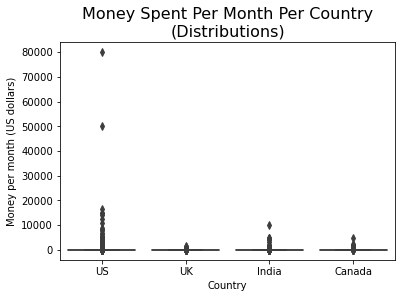

In [26]:
# Isolate only the countries of interest
only_4 = fcc_good[fcc_good['CountryLive'].str.contains(
    'United States of America|India|United Kingdom|Canada')]
# Box plots to visualize distributions
import seaborn as sns
sns.boxplot(y = 'Month_money', x = 'CountryLive',
            data = only_4)
plt.title('Money Spent Per Month Per Country\n(Distributions)',
         fontsize = 16)
plt.ylabel('Money per month (US dollars)')
plt.xlabel('Country')
plt.xticks(range(4), ['US', 'UK', 'India', 'Canada']) # avoids tick labels overlap
plt.show()

In [27]:
fcc_good=fcc_good[fcc_good['Month_money']<20000]
#removing outliers for usa

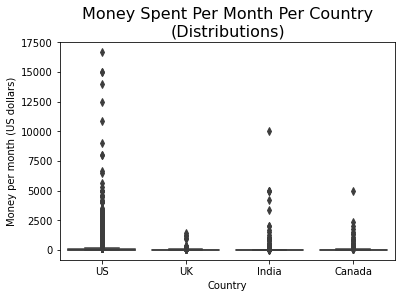

In [28]:
# Isolate only the countries of interest
only_4 = fcc_good[fcc_good['CountryLive'].str.contains(
    'United States of America|India|United Kingdom|Canada')]
# Box plots to visualize distributions
import seaborn as sns
sns.boxplot(y = 'Month_money', x = 'CountryLive',
            data = only_4)
plt.title('Money Spent Per Month Per Country\n(Distributions)',
         fontsize = 16)
plt.ylabel('Money per month (US dollars)')
plt.xlabel('Country')
plt.xticks(range(4), ['US', 'UK', 'India', 'Canada']) # avoids tick labels overlap
plt.show()

We can see a few extreme outliers for India (values over \$2500 per month), but it's unclear whether this is good data or not. Maybe these persons attended several bootcamps, which tend to be very expensive. Let's examine these two data points to see if we can find anything relevant.

In [29]:
india_outliers=only_4[(only_4['CountryLive']=='India') & (only_4['Month_money']>=2500)]
india_outliers

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,Month_money
1728,24.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,India,India,NaN,NaN,A stay-at-home parent or homemaker,NaN,70000.0,NaN,NaN,male,NaN,NaN,0.0,0.0,1.0,NaN,0.0,NaN,NaN,30.0,d964ec629fd6d85a5bf27f7339f4fa6d,950a8cf9cef1ae6a15da470e572b1b7a,NaN,0.0,0.0,0.0,NaN,Within the next 6 months,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,1.0,NaN,1.0,work for a startup,1.0,"User Experience Designer, Mobile Developer...",in an office with other developers,Bengali,"single, never married",20000.0,4.0,38d312a990,2017-03-10 10:22:34,2017-03-10 10:17:42,2017-03-10 10:24:38,2017-03-10 10:22:40,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,bachelor's degree,Computer Programming,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5000.000000
1755,20.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,1.0,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,India,India,NaN,NaN,Not working and not looking for work,NaN,100000.0,NaN,NaN,male,NaN,NaN,0.0,0.0,1.0,NaN,0.0,NaN,NaN,10.0,811bf953ef546460f5436fcf2baa532d,81e2a4cab0543e14746c4a20ffdae17c,NaN,0.0,0.0,0.0,NaN,I haven't decided,NaN,1.0,NaN,1.0,1.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,work for a multinational corporation,1.0,"Information Security, Full-Stack Web Developer...",no preference,Hindi,"single, never married",50000.0,15.0,4611a76b60,2017-03-10 10:48:31,2017-03-10 10:42:29,2017-03-10 10:51:37,2017-03-10 10:48:38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,1.0,1.0,NaN,1.0,NaN,1.0,NaN,1.0,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,1.0,1.0,bachelor's degree,Computer Science,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,Na

In [30]:
only_4 = only_4.drop(india_outliers.index)

In [31]:
usa_outliers= only_4[(only_4['CountryLive']=='United States of America') & (only_4['Month_money']>=6000)]
usa_outlier

NameError: name 'usa_outlier' is not defined

In [ ]:
no_bootcamp_usa = only_4[(only_4['CountryLive'] == 'United States of America') & (only_4['Month_money']>=6000)&(only_4['AttendedBootcamp']==0)]
no_bootcamp_usa
only_4=only_4.drop(no_bootcamp_usa.index)
less_than_3_months = only_4[(only_4['CountryLive'] == 'United States of America') & (only_4['Month_money']>=6000)&(only_4['MonthsProgramming']<= 3)]
less_than_3_months
only_4=only_4.drop(less_than_3_months.index)

In [ ]:
canada_outliers  = only_4[(only_4['CountryLive']=='Canada')&(only_4['Month_money']>=4500)]
only_4 = only_4.drop(canada_outliers.index)

In [ ]:
plot4=only_4.groupby('CountryLive').mean()['Month_money']

In [ ]:
sns.boxplot(x='CountryLive',y='Month_money',data=only_4)
plt.title('Average money spent per month',y=1)
plt.ylabel('Money per month (US dollars)')
plt.xticks(range(4),['US','UK','INDIA','CANADA'])
plt.show()

So it's not crystal clear what to choose between Canada and India. Although it seems more tempting to choose Canada, there are good chances that India might actually be a better choice because of the large number of potential customers.

At this point, it seems that we have several options:

Advertise in the US, India, and Canada by splitting the advertisement budget in various combinations:

60% for the US, 25% for India, 15% for Canada.
50% for the US, 30% for India, 20% for Canada; etc.
Advertise only in the US and India, or the US and Canada. Again, it makes sense to split the advertisement budget unequally. For instance:

70% for the US, and 30% for India.
65% for the US, and 35% for Canada; etc.
Advertise only in the US.

At this point, it's probably best to send our analysis to the marketing team and let them use their domain knowledge to decide. They might want to do some extra surveys in India and Canada and then get back to us for analyzing the new survey data.

## CONCLUSION

In this project, we analyzed survey data from new coders to find the best two markets to advertise in. The only solid conclusion we reached is that the US would be a good market to advertise in.

For the second best market, it wasn't clear-cut what to choose between India and Canada. We decided to send the results to the marketing team so they can use their domain knowledge to take the best decision.